Productionisation of Machine Learning Models (Model Serialization)


In [ ]:
# IMPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# get the output for all commands
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load data set
df = pd.read_csv(r'/content/drive/MyDrive/dataset/insurance.csv')

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df.shape

(1338, 7)

In [ ]:
df.duplicated()
df.duplicated().value_counts()

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

False    1337
True        1
dtype: int64

In [ ]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [ ]:
df.drop_duplicates(keep='first',inplace=True)

In [ ]:
df.reset_index(inplace=True)

In [ ]:
df

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1332,1333,50,male,30.970,3,no,northwest,10600.54830
1333,1334,18,female,31.920,0,no,northeast,2205.98080
1334,1335,18,female,36.850,0,no,southeast,1629.83350
1335,1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df.drop(['index'],axis=1,inplace=True)

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830
1333,18,female,31.920,0,no,northeast,2205.98080
1334,18,female,36.850,0,no,southeast,1629.83350
1335,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# finding outlier
Q1, Q2, Q3 = tuple(df.charges.quantile(q = [0.25,0.5,  0.75]).values)

In [ ]:
print(Q1, Q2, Q3)

4746.344 9386.1613 16657.71745


In [ ]:
IQR = Q3-Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

print(IQR, UL, LL)

11911.37345 34524.777625 -13120.716174999998


In [ ]:
outlist = df[(df.charges > UL) | (df.charges < LL)].index.tolist()

In [ ]:
#df = df.drop(outlist, axis = 0 ).reset_index()

In [ ]:
df.shape

(1337, 7)

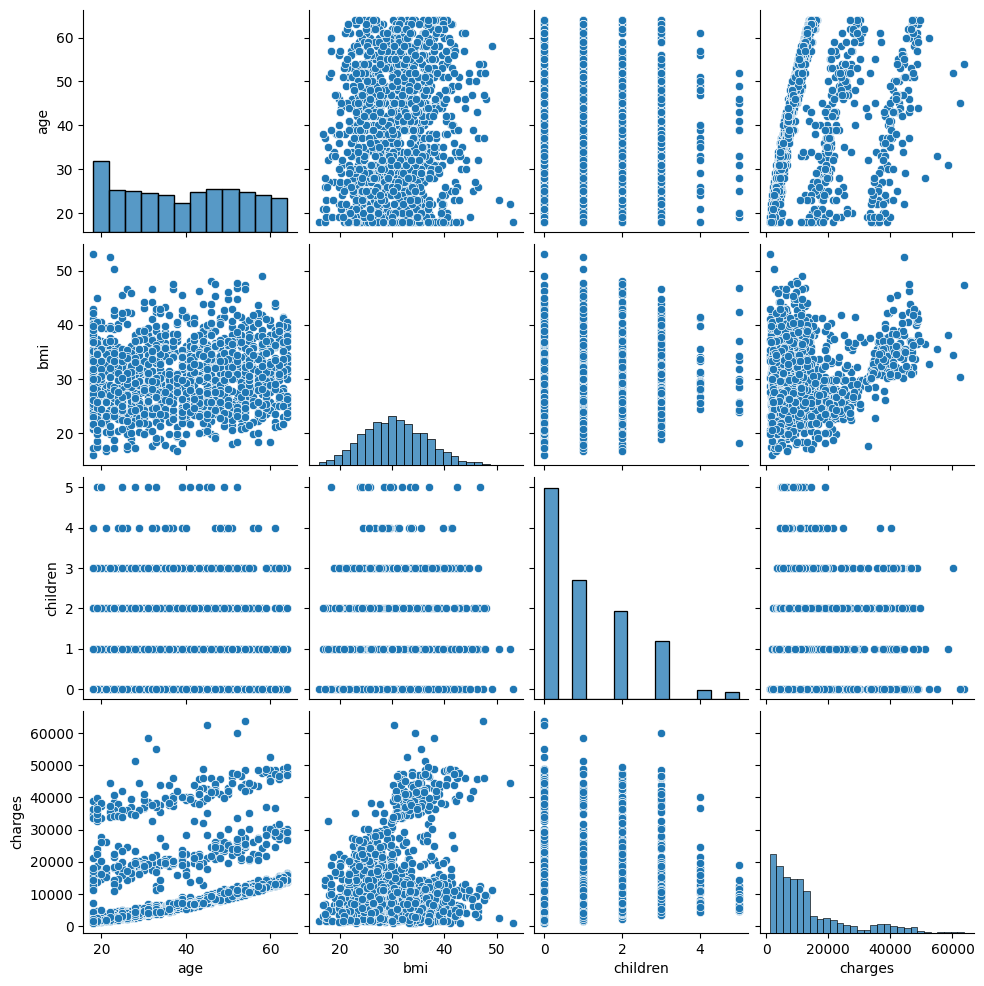

In [ ]:
sns.pairplot(df)

# Data Preparation
- Train Test Split
- Encoding for Categorical Columns
  - Ordinal : LabelEncoding or OrdinalEncoding
  - Nominal : OneHotEncoding or get_dummies
- Encoding for Numerical Columns
  - Standardization (z-transformation)

# Identify the Target Variable and Splitting the Data into **train** and **test**


In [ ]:
import sklearn

print(sklearn.__version__)


1.2.2


In [ ]:
df.columns
df.columns.nunique()

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
# Identifying the inputs (X) and output (y)

y = df['charges']

X = df[['age', 'sex', 'bmi', 'smoker',]]

In [ ]:
# split into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=100)

In [ ]:
X_train.head()

,age,sex,bmi,smoker
999,30,male,22.990,yes
884,32,male,28.930,yes
517,45,male,30.495,no
1131,57,male,40.280,no
1187,43,female,25.270,yes


In [ ]:
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

(1002, 4) (1002,)
(335, 4) (335,)


##  Separating Categorical and Numerical Columns:

In [ ]:
X_train.head()

,age,sex,bmi,smoker
999,30,male,22.990,yes
884,32,male,28.930,yes
517,45,male,30.495,no
1131,57,male,40.280,no
1187,43,female,25.270,yes


In [ ]:
X_train.dtypes

age         int64
sex        object
bmi       float64
smoker     object
dtype: object

In [ ]:
X_train_cat = X_train.select_dtypes(include=['object'])

X_train_cat.head()

,sex,smoker
999,male,yes
884,male,yes
517,male,no
1131,male,no
1187,female,yes


In [ ]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

X_train_num.head()

,age,bmi
999,30,22.990
884,32,28.930
517,45,30.495
1131,57,40.280
1187,43,25.270


# Scaling the Numerical Features

In [ ]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler_std = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_num_rescaled = pd.DataFrame(scaler_std.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)

X_train_num_rescaled.head()

,age,bmi
999,-0.644567,-1.234380
884,-0.502636,-0.267219
517,0.419914,-0.012403
1131,1.271498,1.580808
1187,0.277983,-0.863146


In [ ]:
X_train_num.describe()

,age,bmi
count,1002.000000,1002.000000
mean,39.082834,30.571173
std,14.098417,6.144754
min,18.000000,15.960000
25%,26.000000,26.083750
50%,39.000000,30.300000
75%,51.000000,34.800000
max,64.000000,53.130000


In [ ]:
print("Number of Numerical Features:", scaler_std.n_features_in_)
print("Mean of each column:", scaler_std.mean_)
print("Std of each column:", np.sqrt(scaler_std.var_))

Number of Numerical Features: 2
Mean of each column: [39.08283433 30.57117265]
Std of each column: [14.09138002  6.14168693]


In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830
1333,18,female,31.920,0,no,northeast,2205.98080
1334,18,female,36.850,0,no,southeast,1629.83350
1335,21,female,25.800,0,no,southwest,2007.94500


# Applying OneHotEncoding on Categorical Columns

In [ ]:
#encoder_.categories_

In [ ]:
#encoder_.infrequent_categories_

In [ ]:
# OneHotEncoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder_ohe = OneHotEncoder(drop='first', sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_cat_ohe = pd.DataFrame(encoder_ohe.fit_transform(X_train_cat), 
                               columns=encoder_ohe.get_feature_names_out(X_train_cat.columns), 
                               index = X_train_cat.index)

X_train_cat_ohe.head()

,sex_male,smoker_yes
999,1.0,1.0
884,1.0,1.0
517,1.0,0.0
1131,1.0,0.0
1187,0.0,1.0


## Concatinating the Encoded Categorical Features and Rescaled Numerical Features:

In [ ]:
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat_ohe], axis=1)

X_train_transformed.head()

,age,bmi,sex_male,smoker_yes
999,-0.644567,-1.234380,1.0,1.0
884,-0.502636,-0.267219,1.0,1.0
517,0.419914,-0.012403,1.0,0.0
1131,1.271498,1.580808,1.0,0.0
1187,0.277983,-0.863146,0.0,1.0


# Preparing Test Data

In [ ]:
X_test.head()

,age,sex,bmi,smoker
12,23,male,34.400,no
306,28,female,27.500,no
318,44,female,27.645,no
815,24,female,24.225,no
157,18,male,25.175,yes


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335 entries, 12 to 624
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     335 non-null    int64  
 1   sex     335 non-null    object 
 2   bmi     335 non-null    float64
 3   smoker  335 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 13.1+ KB


In [ ]:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat.head()

,sex,smoker
12,male,no
306,female,no
318,female,no
815,female,no
157,male,yes


In [ ]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

X_test_num.head()

,age,bmi
12,23,34.400
306,28,27.500
318,44,27.645
815,24,24.225
157,18,25.175


In [ ]:
X_test_num_rescaled = pd.DataFrame(scaler_std.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_rescaled.head()

,age,bmi
12,-1.141324,0.623416
306,-0.786497,-0.500054
318,0.348948,-0.476444
815,-1.070359,-1.033295
157,-1.496151,-0.878614


In [ ]:
X_test_cat_ohe = pd.DataFrame(encoder_ohe.transform(X_test_cat), 
                               columns=encoder_ohe.get_feature_names_out(X_test_cat.columns), 
                               index = X_test_cat.index)

X_test_cat_ohe.head()

,sex_male,smoker_yes
12,1.0,0.0
306,0.0,0.0
318,0.0,0.0
815,0.0,0.0
157,1.0,1.0


In [ ]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat_ohe], axis=1)

X_test_transformed.head()

,age,bmi,sex_male,smoker_yes
12,-1.141324,0.623416,1.0,0.0
306,-0.786497,-0.500054,0.0,0.0
318,0.348948,-0.476444,0.0,0.0
815,-1.070359,-1.033295,0.0,0.0
157,-1.496151,-0.878614,1.0,1.0


## Model Building

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_transformed, y_train)

y_test_pred = regressor.predict(X_test_transformed)

temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

LinearRegression()

,Actual,Predicted
12,1826.84300,5376.764021
306,20177.67113,4465.520959
318,7421.19455,8834.630937
815,2842.76075,2327.387796
157,15518.18025,24724.202074


In [ ]:
y_train_pred = regressor.predict(X_train_transformed)

# Adjusted R^2
def Adjusted_r2(y_train,y_train_pred,X_train_transform):
    from sklearn import metrics
    r2 = metrics.r2_score(y_train, y_train_pred)
    n = len(y_train)
    k = X_train_transform.shape[1]

    r2_adj = 1 - (1-r2)*(n-1)/(n-k-1)
    return r2_adj

LR_train_score = Adjusted_r2(y_train,y_train_pred,X_train_transformed) 
print('Train_score', LR_train_score)

Train_score 0.7441864107737908


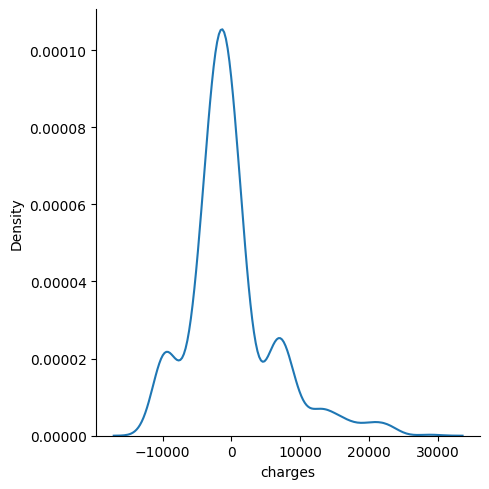

In [ ]:
residual = y_train - y_train_pred

sns.displot(residual, kind='kde');

In [ ]:
# Adjusted R^2
def Adjusted_r2(y_test,y_tes_pred,X_test):
    from sklearn import metrics
    r2 = metrics.r2_score(y_test, y_test_pred)
    n = len(y_test)
    k = X_test.shape[1]

    r2_adj = 1 - (1-r2)*(n-1)/(n-k-1)
    return r2_adj

    
LR_test_score = Adjusted_r2(y_test,y_test_pred,X_test_transformed)
print('Test_score :', LR_test_score)

Test_score : 0.7500304664229677


In [ ]:
sns.__version__

'0.12.2'

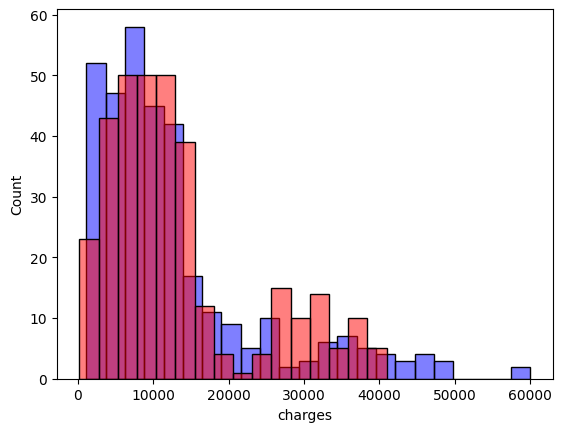

In [ ]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)
import matplotlib.pyplot as plt
plt.show();

In [ ]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  3919.9358361586983
Mean Squared Error:  31632810.086309996
Root Mean Squared Error:  5624.305298106602


# KNN Regression

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(X_train_transformed, y_train)

y_test_pred = regressor.predict(X_test_transformed)

temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
temp_df.head()

KNeighborsRegressor()

,Actual,Predicted
12,1826.84300,5833.547956
306,20177.67113,4336.414330
318,7421.19455,12246.481670
815,2842.76075,11623.973746
157,15518.18025,16896.814690


In [ ]:
y_train_pred = regressor.predict(X_train_transformed)

# Adjusted R^2
def Adjusted_r2(y_train,y_train_pred,X_train_transform):
    from sklearn import metrics
    r2 = metrics.r2_score(y_train, y_train_pred)
    n = len(y_train)
    k = X_train_transform.shape[1]

    r2_adj = 1 - (1-r2)*(n-1)/(n-k-1)
    return r2_adj

KNN_train_score = Adjusted_r2(y_train,y_train_pred,X_train_transformed) 
print('Train_score', KNN_train_score)

Train_score 0.8658726674519962


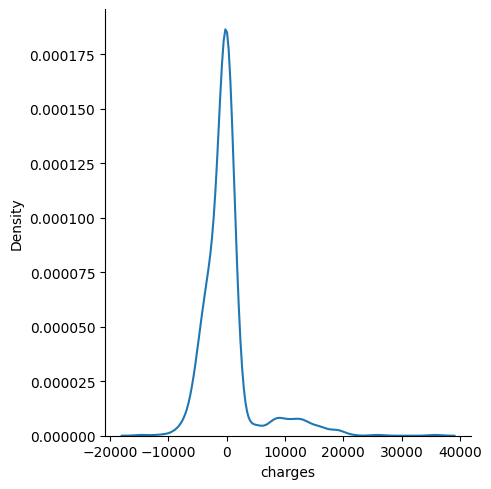

In [ ]:
residual = y_train - y_train_pred

sns.displot(residual, kind='kde');

In [ ]:
# Adjusted R^2
def Adjusted_r2(y_test,y_tes_pred,X_test):
    from sklearn import metrics
    r2 = metrics.r2_score(y_test, y_test_pred)
    n = len(y_test)
    k = X_test.shape[1]

    r2_adj = 1 - (1-r2)*(n-1)/(n-k-1)
    return r2_adj

    
KNN_test_score = Adjusted_r2(y_test,y_test_pred,X_test_transformed)
print('Test_score :', KNN_test_score)

Test_score : 0.8053742111608811


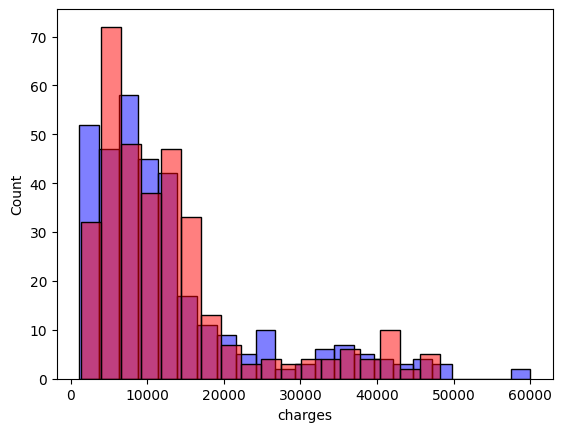

In [ ]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)
import matplotlib.pyplot as plt
plt.show();

In [ ]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  2954.524927316418
Mean Squared Error:  24629243.924835622
Root Mean Squared Error:  4962.785903586374


# Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train_transformed, y_train)

y_test_pred = regressor.predict(X_test_transformed)

temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

DecisionTreeRegressor()

,Actual,Predicted
12,1826.84300,2899.48935
306,20177.67113,4340.44090
318,7421.19455,7626.99300
815,2842.76075,22395.74424
157,15518.18025,18223.45120


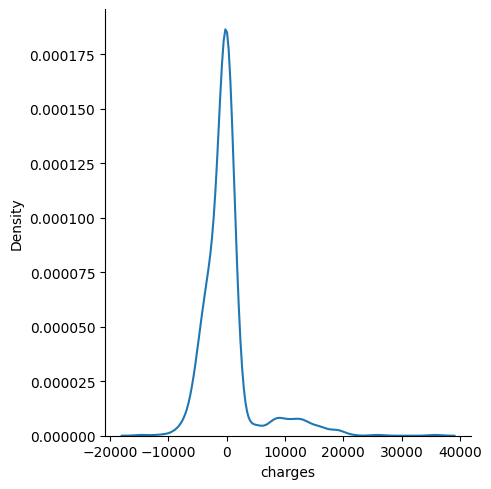

In [ ]:
residual = y_train - y_train_pred

sns.displot(residual, kind='kde');

In [ ]:
y_train_pred = regressor.predict(X_train_transformed)

# Adjusted R^2
def Adjusted_r2(y_train,y_train_pred,X_train_transform):
    from sklearn import metrics
    r2 = metrics.r2_score(y_train, y_train_pred)
    n = len(y_train)
    k = X_train_transform.shape[1]

    r2_adj = 1 - (1-r2)*(n-1)/(n-k-1)
    return r2_adj

DT_train_score = Adjusted_r2(y_train,y_train_pred,X_train_transformed) 
print('Train_score', DT_train_score)

Train_score 0.9972407200364765


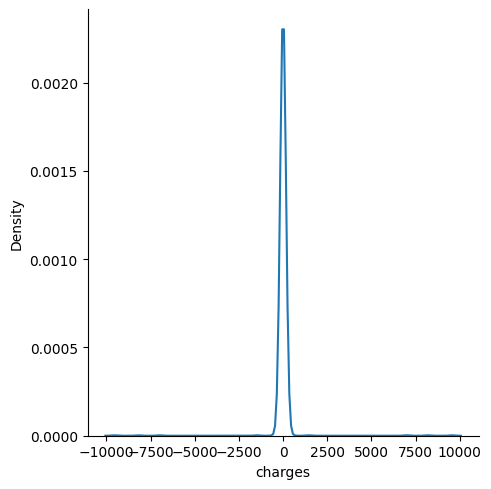

In [ ]:
residual = y_train - y_train_pred

sns.displot(residual, kind='kde');

In [ ]:
# Adjusted R^2
def Adjusted_r2(y_test,y_tes_pred,X_test):
    from sklearn import metrics
    r2 = metrics.r2_score(y_test, y_test_pred)
    n = len(y_test)
    k = X_test.shape[1]

    r2_adj = 1 - (1-r2)*(n-1)/(n-k-1)
    return r2_adj

    
DT_test_score = Adjusted_r2(y_test,y_test_pred,X_test_transformed)
print('Test_score :', DT_test_score)

Test_score : 0.5306394930519707


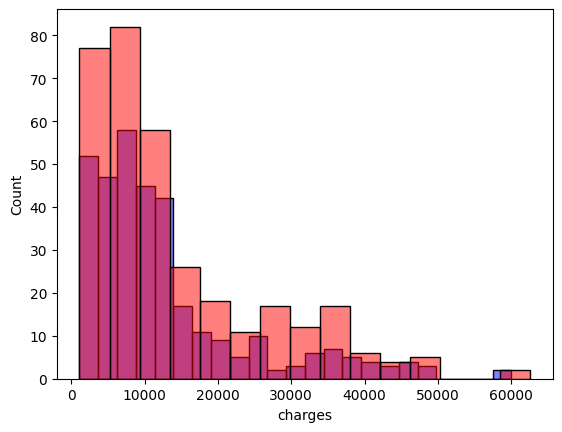

In [ ]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)
import matplotlib.pyplot as plt
plt.show();

In [ ]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  4081.8952232507468
Mean Squared Error:  59396005.44850312
Root Mean Squared Error:  7706.88039666525


# Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train_transformed, y_train)

y_test_pred = regressor.predict(X_test_transformed)

temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

RandomForestRegressor()

,Actual,Predicted
12,1826.84300,3747.425645
306,20177.67113,4567.875154
318,7421.19455,17771.951223
815,2842.76075,13420.220657
157,15518.18025,17288.427764


In [ ]:
y_train_pred = regressor.predict(X_train_transformed)

# Adjusted R^2
def Adjusted_r2(y_train,y_train_pred,X_train_transform):
    from sklearn import metrics
    r2 = metrics.r2_score(y_train, y_train_pred)
    n = len(y_train)
    k = X_train_transform.shape[1]

    r2_adj = 1 - (1-r2)*(n-1)/(n-k-1)
    return r2_adj

RF_train_score = Adjusted_r2(y_train,y_train_pred,X_train_transformed) 
print('Train_score', RF_train_score)

Train_score 0.9726673430823182


In [ ]:
# Adjusted R^2
def Adjusted_r2(y_test,y_tes_pred,X_test):
    from sklearn import metrics
    r2 = metrics.r2_score(y_test, y_test_pred)
    n = len(y_test)
    k = X_test.shape[1]

    r2_adj = 1 - (1-r2)*(n-1)/(n-k-1)
    return r2_adj

    
RF_test_score = Adjusted_r2(y_test,y_test_pred,X_test_transformed)
print('Test_score :', RF_test_score)

Test_score : 0.8016400039540199


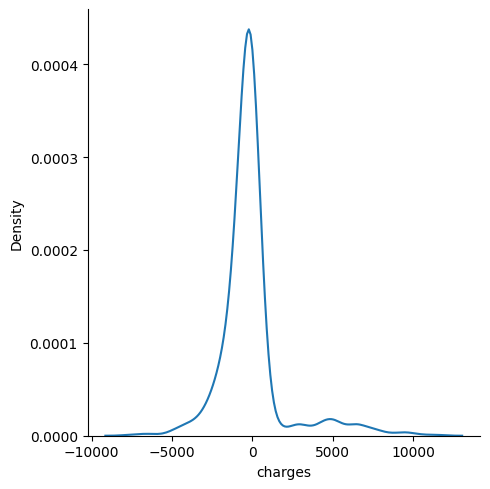

In [ ]:
residual = y_train - y_train_pred

sns.displot(residual, kind='kde');

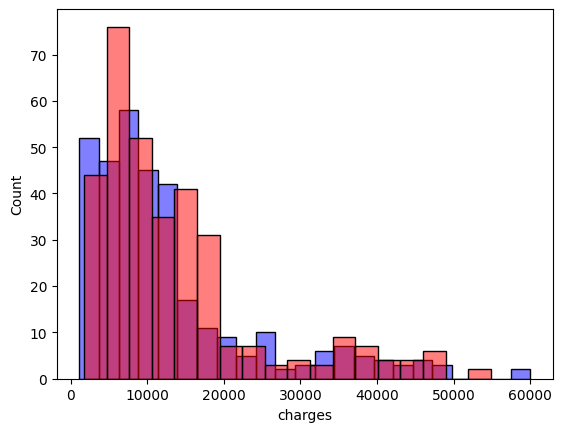

In [ ]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)
import matplotlib.pyplot as plt
plt.show();

In [ ]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  3008.1772342543813
Mean Squared Error:  25101795.38223621
Root Mean Squared Error:  5010.1691969669255


In [ ]:
import numpy as np
data = np.array([
                 ['Linear Regression',LR_train_score,LR_test_score],
                 ['KNN Regression',KNN_train_score,KNN_test_score],
                 ['Decision Tree Regression',DT_train_score,DT_test_score],
                 ['Random Forest Regression',RF_train_score,RF_test_score],
            ])
df1 = pd.DataFrame(data,columns = ['Algorithm',' Train_score',' Test_score'])

# Observation

In [ ]:
df1   
# adjusted r2 for train and test

,Algorithm,Train_score,Test_score
0,Linear Regression,0.7441864107737908,0.7500304664229677
1,KNN Regression,0.8658726674519962,0.8053742111608811
2,Decision Tree Regression,0.9972407200364765,0.5306394930519707
3,Random Forest Regression,0.9726673430823182,0.8016400039540199


 **Random Forest Regression** algorithm is the best model for medical cost prediction.

## FInding the best Hyperparameter By performing K-Fold Corss-Validation

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

In [ ]:
tuned_parameters = [{'max_depth' : [1,2,3,4,5,6,7,8,9]}]

regressor_RF = GridSearchCV(
    estimator=RandomForestRegressor(), 
    param_grid=tuned_parameters, 
    scoring='r2',
    cv=5,
    return_train_score=True,
    verbose=1
)
regressor_RF.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]}],
             return_train_score=True, scoring='r2', verbose=1)

In [ ]:
print("Best parameters set found on train set")
print(regressor_RF.best_params_)
print(regressor_RF.best_estimator_)
print()

print('Test_score: ', regressor_RF.score(X_test_transformed, y_test))

Best parameters set found on train set
{'max_depth': 3}
RandomForestRegressor(max_depth=3)

Test_score:  0.8692810449474497


# Applying Hyperparameter tunnig max_depth = 3

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RF_regressor = RandomForestRegressor(max_depth=3,random_state=10)
RF_regressor.fit(X_train_transformed, y_train)

RandomForestRegressor(max_depth=3, random_state=10)

In [ ]:
y_test_pred1 = regressor.predict(X_test_transformed)

# Adjusted R^2
def Adjusted_r2(y_test,y_tes_pred1,X_test):
    from sklearn import metrics
    r2 = metrics.r2_score(y_test, y_test_pred1)
    n = len(y_test)
    k = X_test.shape[1]

    r2_adj = 1 - (1-r2)*(n-1)/(n-k-1)
    return r2_adj

Adjusted_r2(y_test,y_test_pred1,X_test_transformed)

0.8016400039540199

### Saving the Model

In [ ]:
from pickle import dump

dump(scaler_std, open('/content/drive/MyDrive/models/std_scaler.pkl', 'wb'))
dump(encoder_ohe, open('/content/drive/MyDrive/models/ohe_encoder.pkl', 'wb'))
dump(RF_regressor, open('/content/drive/MyDrive/models/RF_model.pkl', 'wb'))
